#### Dataset

In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()

print(f"ClassNames: {dataset.target_names}")

ClassNames: ['malignant' 'benign']


In [4]:
x = dataset.data
y = dataset.target

print(f"x-shape: {x.shape}")

x-shape: (569, 30)


#### PCA

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler()
scaler.fit(x)

# StandardScaler.fit(x)
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
print(f"x mean:\n{x_mean}")
print(f"x std:\n{x_std}")

x_standardized = scaler.transform(x)
print(x_standardized[0])

# StandardScaler.transform(x)
x_ = (x - x_mean) / x_std
print(x_[0])

x mean:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
x std:
[3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]
[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.283

In [7]:
n_components = 15
pca = PCA(n_components=n_components, copy=True)
pca.fit(x_standardized)
x_pca = pca.transform(x_standardized)

In [8]:
print(f"Components:\n{pca.components_}")
print(f"Explained Variance:\n{pca.explained_variance_}")
print(f"Explained Variance Ratio:\n{pca.explained_variance_ratio_}")
print(f"Sum of Exmplained Variance Ratio:\n{sum(pca.explained_variance_ratio_)}")

Components:
[[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.19351858e-01
   1.72304352e-01  1.43593173e-01  9.79641143e-02 -8.25723507e-03
   1.41883349e-01  2.75339469

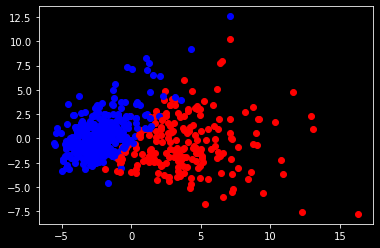

In [9]:
colors = ["red", "blue"]
for index, point in enumerate(x_pca):
    plt.scatter(point[0], point[1], color=colors[y[index]])
plt.show()